<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week3/ML_3_2_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supervised learning**:

  - Linear models 
  - Support Vector Machines
  - Tree-based methods 
  - Nearest neighbors 
  - Neural networks 

**Unsupervised learning**:

  - Clustering (KMeans, Ward, ...)
  - Outlier detection

**Reinforcement learning**:
  - ?

## Accuracy and precision

1. precision: 
The fraction of relevant instances among the retrieved instances, 
1. recall:
The fraction of relevant instances that have been retrieved over the total amount of relevant instances. 
1. F-score


* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

* The support is the number of occurrences of each class in y_true.

Take a look at [HERE](https://en.wikipedia.org/wiki/F1_score) or [HERE](https://en.wikipedia.org/wiki/Precision_and_recall).

In [ ]:
import numpy as np
import pylab as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
plt.style.use ('seaborn')

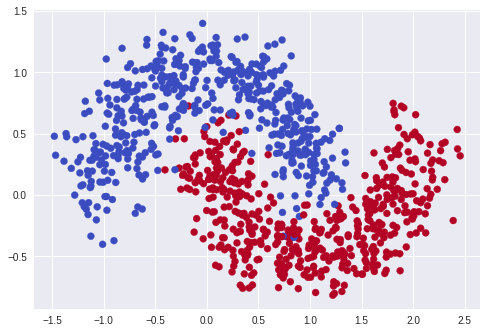

In [ ]:
# Generate data
from sklearn.datasets import make_blobs,make_circles,make_moons
# X, y = make_blobs(n_samples=1000, centers=2,
#                   cluster_std=1.5,
#                   center_box=(-4.0, 4.0))
# X, y = make_circles(n_samples=1000, noise=.1, factor=.5)
X,y = make_moons(n_samples=1000, noise=.2)

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.coolwarm)


In [ ]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


In [ ]:
print(X[:3]) 

[[ 0.39905803  0.97157888]
 [-1.17670092  0.76499168]
 [ 1.23595346 -0.80109898]]


In [ ]:
print(y[:3])

[0 0 1]


In [ ]:
X_train, y_train = X[:700], y[:700]
X_test, y_test = X[700:], y[700:]

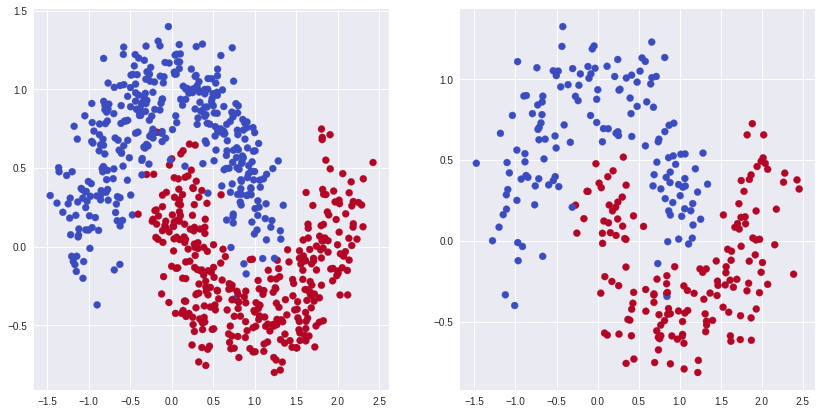

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))

ax1.scatter(X_train[:,0],X_train[:,1],c=y_train, cmap=plt.cm.coolwarm)
ax2.scatter(X_test[:,0],X_test[:,1],c=y_test, cmap=plt.cm.coolwarm,)


In [ ]:
def make_region(X,Y,clf):
    fig, ax = plt.subplots()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])

    Z = Z.reshape(xx2.shape)
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
    ax.axis([x_min, x_max,y_min, y_max])

In [ ]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       144
           1       0.83      0.89      0.86       156

    accuracy                           0.85       300
   macro avg       0.85      0.84      0.85       300
weighted avg       0.85      0.85      0.85       300

[[115  29]
 [ 17 139]]
accuracy is 0.8466666666666667


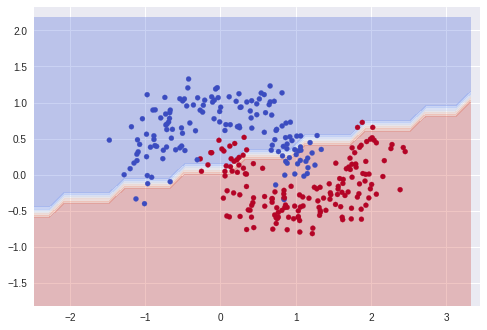

In [ ]:
make_region(X_test,y_test,Model)

## K-Nearest Neighbours

In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       144
           1       0.97      1.00      0.99       156

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[140   4]
 [  0 156]]
accuracy is 0.9866666666666667


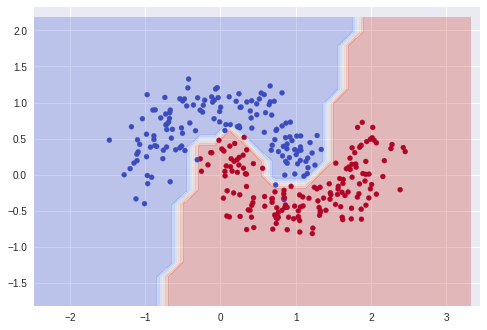

In [ ]:
make_region(X_test,y_test,Model)

##  Radius Neighbors Classifier

In [ ]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=3.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

print('accuracy is ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       144
           1       1.00      0.24      0.38       156

    accuracy                           0.60       300
   macro avg       0.77      0.62      0.55       300
weighted avg       0.78      0.60      0.54       300

[[144   0]
 [119  37]]
accuracy is  0.6033333333333334


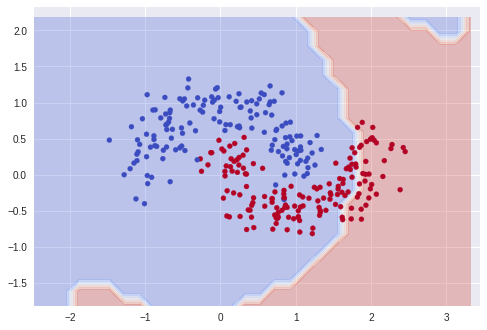

In [ ]:
make_region(X_test,y_test,Model)

## SVM

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC(kernel='rbf')
# Model = svm.LinearSVC(C=1)

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.97      0.99      0.98       156

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[140   4]
 [  1 155]]
accuracy is 0.9833333333333333


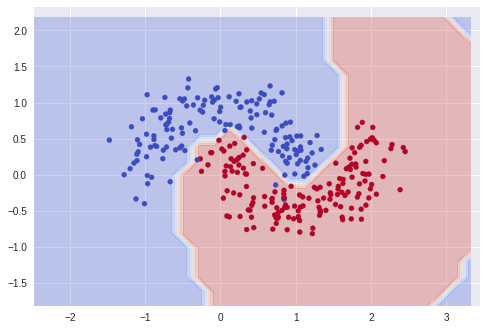

In [ ]:
make_region(X_test,y_test,Model)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       144
           1       0.97      0.98      0.97       156

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

[[139   5]
 [  3 153]]
accuracy is 0.9733333333333334


In [ ]:
y_pred = Model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       344

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



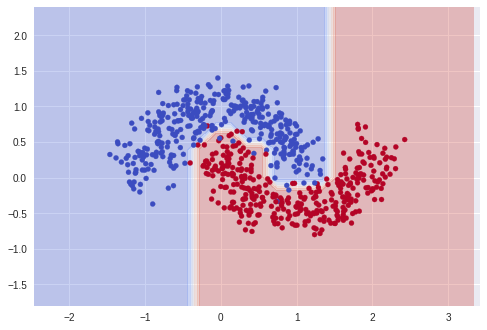

In [ ]:
make_region(X_train,y_train,Model)

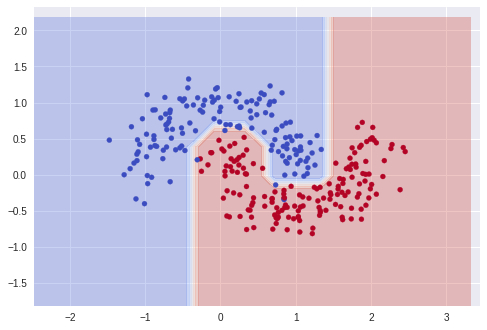

In [ ]:
make_region(X_test,y_test,Model)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       144
           1       0.88      0.93      0.91       156

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[125  11]
 [ 19 145]]
accuracy is  0.9


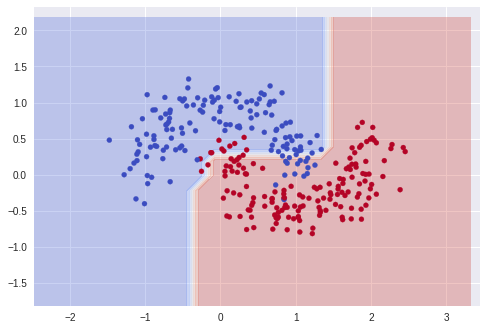

In [ ]:
make_region(X_test,y_test,Model)

In [ ]:
Model.feature_importances_

array([0.44555936, 0.55444064])

## Neural network

![](https://www.bogotobogo.com/python/scikit-learn/images/NeuralNetwork1/NN-with-components-w11-etc.png)

In [ ]:
from sklearn.neural_network import MLPClassifier

Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       144
           1       0.91      0.95      0.93       156

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[129  15]
 [  8 148]]
accuracy is  0.9233333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


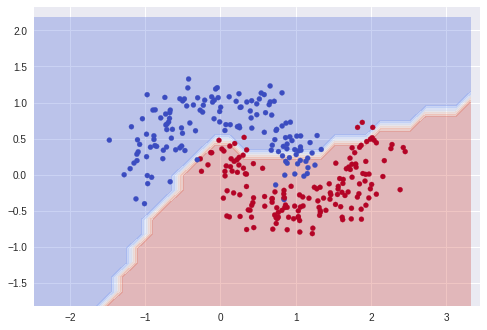

In [ ]:
make_region(X_test,y_test,Model)